# CURRENT QUIVER PLOT

In [1]:
#masukin library dulu 
import os
os.environ['PROJ_LIB'] = r'C:/Users/user/anaconda3/Lib/site-packages/mpl_toolkits/basemap'
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic
import matplotlib.pyplot as plt
from   netCDF4 import *

# Input Data Arus

In [2]:
#masukin lokasi .nc nya dimana
fn='D:/smt7/asisten andat/arus1.nc4' #D:/smt7/arus.nc
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds=nc.Dataset(fn)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.0 NAVO_netcdf_v1.0
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBu0.08/expt_19.1/2000; Translation Date = 2020-10-28T07:56:14.229Z
    geospatial_lat_min: -7.28000020980835
    geospatial_lat_max: -2.319999933242798
    geospatial_lon_min: 94.9599609375
    geospatial_lon_max: 102.0
    dimensions(sizes): time(31), depth(1), lat(63), lon(89)
    variables(dimensions): int16 water_u(time,depth,lat,lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon), int16 water_v(time,d

## Deklarasi Data Arus
data arus yang digunakan dalam plot quiver merupakan data spasial, jadi gausah diambil di grid tertentu

In [3]:
u10=ds.variables['water_u'][0,0,:,:] 
v10=ds.variables['water_v'][0,0,:,:]
lon=ds.variables['lon'][:]
lat=ds.variables['lat'][:]
time=ds.variables['time'][:]

var = np.sqrt(abs(u10*u10) + (v10*v10))

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u10))
print('dimensi v',np.shape(v10))
print('dimensi lon',np.shape(lon))
print('dimensi lat',np.shape(lat))
print('dimensi time',np.shape(time))

dimensi u (63, 89)
dimensi v (63, 89)
dimensi lon (89,)
dimensi lat (63,)
dimensi time (31,)


In [6]:
u, lonsout = addcyclic(u10, lon)
v, lonsout = addcyclic(v10, lon)
print ("lon[0]: ", lonsout[0], "lon[-1]: ", lonsout[-1])
print ("lat[0]: ", lat[0], "lat[-1]: ", lat[-1])

lonsout2=(lonsout[:(len(lonsout)-1)]) #memotong 1 data

print (lonsout2[:])
print (lat[:])
#cek dulu lon dan lat nya naik dari kecil ke besar engga, kalo misalnya belom ditambah begini
#lat2= lat[::-1] atau lonsout3=lonsout2[::-1] gitudeh terus dibawah jangan lupa diubah juga waktu plot quiver 

lon[0]:  94.9599609375 lon[-1]:  94.9599609375
lat[0]:  -7.28000020980835 lat[-1]:  -2.319999933242798
[ 94.95996094  95.04003906  95.11999512  95.19995117  95.2800293
  95.35998535  95.43994141  95.52001953  95.59997559  95.68005371
  95.76000977  95.83996582  95.92004395  96.          96.07995605
  96.16003418  96.23999023  96.31994629  96.40002441  96.47998047
  96.56005859  96.64001465  96.7199707   96.80004883  96.88000488
  96.95996094  97.04003906  97.11999512  97.19995117  97.2800293
  97.35998535  97.43994141  97.52001953  97.59997559  97.68005371
  97.76000977  97.83996582  97.92004395  98.          98.07995605
  98.16003418  98.23999023  98.31994629  98.40002441  98.47998047
  98.56005859  98.64001465  98.7199707   98.80004883  98.88000488
  98.95996094  99.04003906  99.11999512  99.19995117  99.2800293
  99.35998535  99.43994141  99.52001953  99.59997559  99.68005371
  99.76000977  99.83996582  99.92004395 100.         100.07995605
 100.16003418 100.23999023 100.31994629 10

## Membuat Quiver Plot Arus

Text(0.5, 1.0, 'QUIVER PLOT ARUS DI ......')

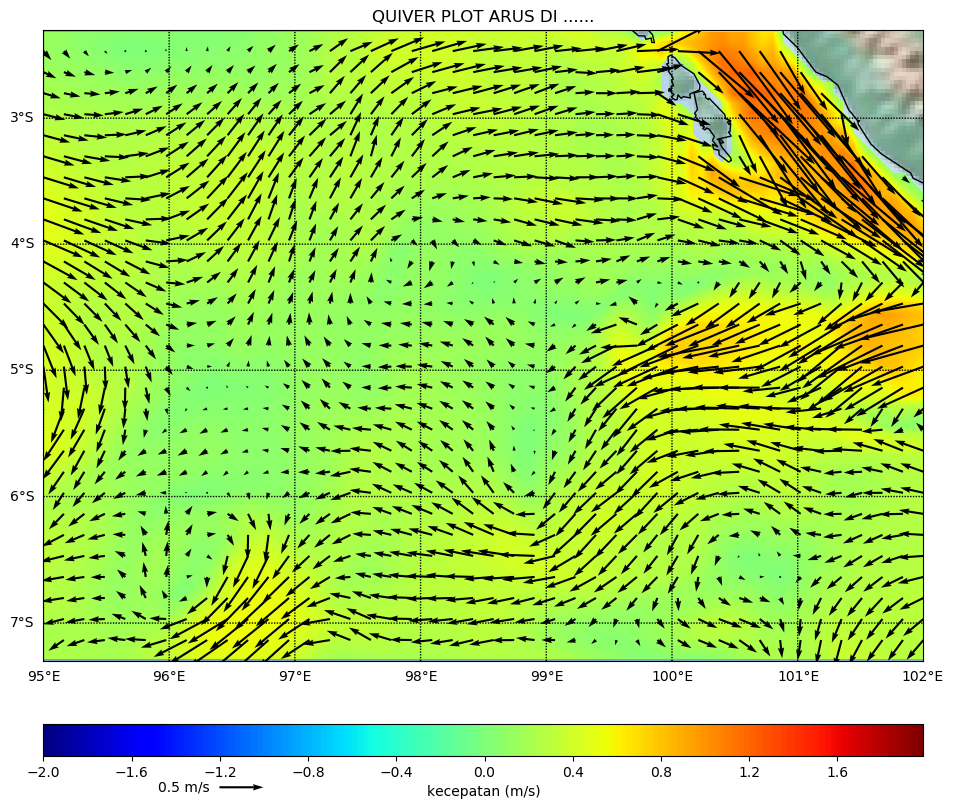

In [10]:
#-- Membuat figure
dpi = 100
fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax  = fig.add_axes([0.1,0.1,0.8,0.9])

#-- Membuat map #isi koordinat masing2 yaa
map = Basemap(projection='merc',llcrnrlat= -7.3 ,urcrnrlat= -2.3,\
            resolution='i',  llcrnrlon=95,urcrnrlon=102)

map.shadedrelief()

#-- menggambarkan coastlines, batas wilayah dan negara
map.drawcoastlines()
map.drawstates()
map.drawcountries()

#-- membuat grid
map.drawparallels(np.arange(-90,90,1),labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180,180,1),labels=[0,0,0,1],fontsize=10)

#-- mengubah latitute dan longitude menjadi x y 
x, y = map(*np.meshgrid(lon,lat))

#-- contour levels
clevs = np.arange(-2,2,0.01) #bisa diubah2 sesuai cakupan data

#-- Countour
cnplot = map.contourf(x,y,var,clevs,cmap=plt.cm.jet)

#-- colorbar
cbar = map.colorbar(cnplot,location='bottom',pad="10%")      #-- pad: jarak peta dengan colorbar
cbar.set_label('kecepatan (m/s)')                            #-- Masukan nama colorbar

#-- transformasi vector dan data koordinat, membuat vector
veclon = int(u10.shape[1]/2)                    #-- only every 2nd vector
veclat = int(u10.shape[0]/2)                   #-- only every 2nd vector

uproj,vproj,xx,yy = map.transform_vector(u,v,lonsout2,lat,veclon,veclat,returnxy=True,masked=True)

#-- create vector plot on map
vecplot = map.quiver(xx,yy,uproj,vproj,scale=10) #skala bisa diganti
qk = plt.quiverkey(vecplot, 0.2, -0.2, 0.5, '0.5 m/s', labelpos='W')  #legenda quiver, diubah2 berdasarkan cakupan data juga
#JUDUL
plt.title('QUIVER PLOT ARUS DI ......') #JUDUL UBAH SESUAI DAERAH / menyesuaikan sendiri
#plt.savefig('D:/.png',dpi=300) #D:/smt7/quiver.png

# QUIVER PLOT ANGIN DAN SST

## Input Data Angin dan SST

In [ ]:
#masukin lokasi .nc nya dimana
fn='D:/.nc' #D:/smt7/angin.nc
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds=nc.Dataset(fn)
ds

## Deklarasi Data Angin SST
karena data spasial jadi tidak perlu dipilih grid tertentu

In [ ]:
u2=ds.variables['u10'][0,:,:]
v2=ds.variables['v10'][0,:,:]
lon2=ds.variables['longitude'][:]
lat2=ds.variables['latitude'][:]
time=ds.variables['time'][:]
... = ds.variables['sst'][0,:,:] #kira-kira input sst jadi apanya

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u2))
print('dimensi v',np.shape(v2))
print('dimensi lon',np.shape(lon2))
print('dimensi lat',np.shape(lat2))
print('dimensi time',np.shape(time2))
print('dimensi sst',np.shape(...))

In [ ]:
u3, lonsout1 = addcyclic(u2, lon2)
v3, lonsout1 = addcyclic(v2, lon2)
print ("lon[0]: ", lonsout1[0], "lon[-1]: ", lonsout1[-1])
print ("lat[0]: ", lat2[0], "lat[-1]: ", lat2[-1])

lonsout22=(lonsout1[:(len(lonsout1)-1)])
#lat2= lat[::-1] #reverse agar latitude dari kecil ke besar
print (lonsout22[:])
print (lat2[:])

#cek dulu lon dan lat nya naik dari kecil ke besar engga, kalo misalnya belom ditambah begini
#lat2= lat[::-1] atau lonsout3=lonsout2[::-1] gitudeh terus dibawah jangan lupa diubah juga waktu plot quiver 

In [ ]:
#-- Membuat figure
dpi = 100
fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax  = fig.add_axes([0.1,0.1,0.8,0.9])

#-- Membuat map #isi koordinat masing2 yaa
map = Basemap(projection='merc',llcrnrlat= ...,urcrnrlat= ...,\
            resolution='i',  llcrnrlon=...,urcrnrlon=...)

map.shadedrelief()

#-- menggambarkan coastlines, batas wilayah dan negara
map.drawcoastlines()
map.drawstates()
map.drawcountries()

#-- membuat grid
map.drawparallels(np.arange(-90,90,1),labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180,180,1),labels=[0,0,0,1],fontsize=10)

#-- mengubah latitute dan longitude menjadi x y 
x2, y2 = map(*np.meshgrid(lon,lat))

#-- contour levels
clevs = np.arange(...,...,0.1) #bisa diubah2 sesuai cakupan data(data terkecil,data terbesar,loncat)

#-- Countour
cnplot = map.contourf(x2,y2,var2,clevs,cmap=plt.cm.jet)

#-- colorbar
cbar = map.colorbar(cnplot,location='bottom',pad="10%")      #-- pad: jarak peta dengan colorbar
cbar.set_label('Temperatur (...)')                            #-- Masukan nama colorbar, kirakira satuannya apa ya dari ecmwf??
#-- transformasi vector dan data koordinat, membuat vector
veclon2 = int(u10.shape[1]/2)                    #-- only every 2nd vector
veclat2 = int(u10.shape[0]/2)                   #-- only every 2nd vector

#ubah lat lon nya disini jadi lonsout3 atau lat2
uproj2,vproj2,xx2,yy2 = map.transform_vector(u3,v3,lonsout22,lat2,veclon2,veclat2,returnxy=True,masked=True)

#-- create vector plot on map
vecplot = map.quiver(xx2,yy2,uproj2,vproj2,scale=20) #scale di ubah2 agar panah sesuai 
qk = plt.quiverkey(vecplot, 0.2, -0.2, 5, '5 m/s', labelpos='W')  #legenda quiver bisa diubah sesuai kebutuhan
#JUDUL
plt.title('QUIVER PLOT ANGIN DI ......') #JUDUL UBAH SESUAI DAERAH / menyesuaikan sendiri
#plt.savefig('D:/.png',dpi=300) #D:/smt7/quiver.png